## LAB 01 : Matrices,  vectors, and beginning R for statistics

### How to define a vector in R

The R computing language shares many similarities to Python, however, we need to learn a slightly different syntax for defining objects in R.

For example, in Python we defined a function called "sum" that took two objects a and b like this

    def sum(a,b):
        return a+b
    
In R you can also define a function, but how you define a function looks a bit different.    

In [3]:
sum = function(a,b){
    return(a+b)
}
sum(8,9)

[1] 17

Above, we create an object called "sum" that is assigned a function that takes as input two objects a,b. 
After a few weeks of work you will see that R and Python behave similarly, and by learning a R you will strengthen your understanding of both R and Python (really). 

### Vectors
The vector is a fundemental object in R.
We can define a vector $v$ like this 

In [4]:
v = c(1,2,3) # (the "c" stands for combine, as in, combine these numbers into a vector)

This is a vector of length three containing the ordered numbers 1,2, and 3. 
This should remind you of the Python [list](https://www.w3schools.com/python/python_lists.asp).

In R, you can acces the first element of a vector by referencign the name of the vector, square brackets, and the number 1.

In [6]:
v[1]

[1] 1

You can access the second element like this

In [9]:
v[2]

[1] 2

The number $2$ is often called an **index**. 

In Python, we were able to locate items in a list by entering a positive number (forward indexing) or by entering a negative number (looking backward). 
Negative indices in R do **NOT** work the same. 

In [13]:
v[-1]

[1] 2 3

A negative index **removes** that item from the vector and returns the remaining items. 

In [15]:
v[-2]

[1] 1 3

The length of a vector can be computed in R using the [length](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/length) function.
The length function is useful for accessing the last item in a vector. 

In [17]:
L = length(v)
v[L]

[1] 3

Vectors in R work just like they do in the mathematics we learned during lecture.
You can multiply a vector by a scalar

In [18]:
3*v

[1] 3 6 9

and you can add two vector so long as they have the same length

In [26]:
v = c(1,2,3)
k = c(3,2,1)
q = c(3,2,1,-1)
j = c(1,0)

In [27]:
v+k

[1] 4 4 4

But you need to be very careful if two vectors do not have the same length because R will still return a vector. 
Lets look at what happens when we add $k$ of length 3 and $j$ of length 2 

In [28]:
k+j

Warning message in k + j:
“longer object length is not a multiple of shorter object length”


[1] 4 2 2

R still returns a new vector! But what happened here? 
The vector $k$ contains the ordered item (3,2,1) and $j$ contains the items (1,0) and is one item shorter than $k$.
To make the vector $j$ a length of 3, R tacked onto the end of $j$ the first item again. That is, R changed $i$ from (1,0) to (1,0,1) and then added together $k$ and this "extended" $j$ vector. Yikes! 

Lets look at another example, adding $q$ of length 4 and $j$ of length 2.

In [29]:
q+j

[1]  4  2  2 -1

What is happening here? 
The vector $q$ has four items but $j$ has only two. 
To make $j$ the same length as $q$, R extended $j$.
The first item of $j$ was copied into the third position and the second item in $j$ was copied into the fourth item. 
R changed $j$ from (1,0) to (1,0,1,0).

This process in R is called **recycling**

### Matrices 

Matrices in R can be built by calling, you guessed it, the function called [matrix](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/matrix).
The matrix function requires you to provide a vector of elements to include in the matrix and either the number of rows, number of columns, or both. 

In [40]:
M = matrix(c(1,2,3,4),nrow=2)
print(M)

     [,1] [,2]
[1,]    1    3
[2,]    2    4


By default, R fills in the matrix column by column.
If you would rather the matrix be filled row by row you can add the option byrow=TRUE.
Just like in python, the word TRUE is a special object in R.

In [41]:
M = matrix(c(1,2,3,4),nrow=2,byrow=TRUE)
print(M)

     [,1] [,2]
[1,]    1    2
[2,]    3    4


Individual elements in a matrix can be accessed by typing the name of the matrix, square brackets, and entering the row number and column number of the itme you want. 

In [47]:
M[1,2]

[1] 1 2

If you only provide a row number, then R returns the entire row

In [50]:
M[1,]

[1] 1 2

If you only provide a column number, then R returns the entire column

In [53]:
M[,2]

[1] 2 4

Just like we learned in class, you can add and subtract matrices in R. 

In [45]:
M = matrix(c(1,2,3,4),nrow=2,byrow=TRUE)
N = matrix(c(-1,0.98,-10,4),nrow=2,byrow=TRUE)

print("M")
print(M)

print("N")
print(N)

Z = M+N
print("M plus N")
print(Z)

print("M minus N")
print(M-N)

[1] "M"
     [,1] [,2]
[1,]    1    2
[2,]    3    4
[1] "N"
     [,1] [,2]
[1,]   -1 0.98
[2,]  -10 4.00
[1] "M plus N"
     [,1] [,2]
[1,]    0 2.98
[2,]   -7 8.00
[1] "M minus N"
     [,1] [,2]
[1,]    2 1.02
[2,]   13 0.00


To multiply a matrix times a vector, we need to use a special multiply symbol in R

In [55]:
M = matrix(c(1,2,3,4),nrow=2,byrow=TRUE)
v = c(-1,1)

print("M")
print(M)

print("v")
print(v)

mTimesv = M%*%v

print("M times v")
print(mTimesv)

[1] "M"
     [,1] [,2]
[1,]    1    2
[2,]    3    4
[1] "v"
[1] -1  1
[1] "M times v"
     [,1]
[1,]    1
[2,]    1


### Loading a package in R
To load a package in R you use the require or library command.

In [56]:
library(MASS)

### The data frame
One of the most important objects in R is the dataframe.
The dataframe is a matrix where rows represent observations and columns correpsond to different covariates.

Inside the MASS package, which we just loaded, are a ton of datasets for free. 
lets look at the dataset *GAGurine*. This dataset is described as 

"Data were collected on the concentration of a chemical GAG in the urine of 314 children aged from zero to seventeen years. The aim of the study was to produce a chart to help a paediatrican to assess if a child's GAG concentration is ‘normal’."

In [65]:
d = GAGurine
print(d)

      Age  GAG
1    0.00 23.0
2    0.00 23.8
3    0.00 16.9
4    0.00 18.6
5    0.01 17.9
6    0.01 25.9
7    0.01 16.5
8    0.01 26.3
9    0.01 26.9
10   0.01 17.9
11   0.01 29.1
12   0.02 32.6
13   0.02 41.9
14   0.03 38.7
15   0.03 37.6
16   0.03 46.4
17   0.04 30.5
18   0.04 34.8
19   0.04 26.7
20   0.05 33.0
21   0.05 56.3
22   0.05 33.5
23   0.05 29.7
24   0.05 32.8
25   0.05 27.6
26   0.06 31.9
27   0.07 55.4
28   0.10 33.3
29   0.10 36.4
30   0.14 25.9
31   0.14 21.6
32   0.15 26.0
33   0.17 12.8
34   0.18 34.2
35   0.23 19.4
36   0.24 21.9
37   0.24 19.3
38   0.25 26.2
39   0.27  9.6
40   0.28 36.1
41   0.29 19.7
42   0.29 19.2
43   0.30 20.4
44   0.33 23.1
45   0.33 23.8
46   0.40 21.6
47   0.41 25.4
48   0.45 18.4
49   0.46 18.6
50   0.47 26.4
51   0.50 25.7
52   0.50 20.4
53   0.53 15.9
54   0.55 20.8
55   0.56 20.9
56   0.56 15.7
57   0.57 20.4
58   0.58 14.1
59   0.59 21.4
60   0.59 15.6
61   0.62 30.5
62   0.64 15.4
63   0.65 19.2
64   0.65 22.6
65   0.69 15.2
66   0.71 

Because a dataframe is a matrix, we can ask R to return columns, rows, etc. 
Below i ask R for the second column

In [67]:
d[,2]

[1] 23.0 23.8 16.9 18.6 17.9 25.9 16.5 26.3 26.9 17.9 29.1 32.6 41.9 38.7 37.6
 [16] 46.4 30.5 34.8 26.7 33.0 56.3 33.5 29.7 32.8 27.6 31.9 55.4 33.3 36.4 25.9
 [31] 21.6 26.0 12.8 34.2 19.4 21.9 19.3 26.2  9.6 36.1 19.7 19.2 20.4 23.1 23.8
 [46] 21.6 25.4 18.4 18.6 26.4 25.7 20.4 15.9 20.8 20.9 15.7 20.4 14.1 21.4 15.6
 [61] 30.5 15.4 19.2 22.6 15.2 14.9 39.5 17.3 17.2 13.8 17.7 15.6 20.4 14.8 19.5
 [76] 18.0 22.5 20.4 13.1 17.4 18.9 16.1 21.9 18.4 15.2 19.1 15.1 17.2 18.4 24.1
 [91] 19.0 16.0 21.8 16.5 16.2 10.8 27.0 17.3 18.3 18.3 13.3 12.1 11.0 12.7 13.4
[106] 14.3 11.5 16.5 25.1 16.3 15.4 18.6 18.3 13.2 11.1 11.0 12.5 14.8 16.8 12.8
[121] 12.2 14.7  9.7 14.2 13.9  9.5 14.6 12.1 10.6 10.8 10.4  9.9  9.6 21.7 11.8
[136] 11.8 13.0 11.3  9.0 18.3 14.6 11.5  7.3 11.6  8.6 11.5  8.3 10.3 12.5 13.2
[151] 17.9 10.7  8.6 12.5  8.6  6.0 12.6 12.7 10.2 10.7  8.4  9.9  7.7 13.6 12.3
[166]  7.5 11.8  7.7 10.3 16.9  8.5  9.7 10.6  6.4  8.8  8.8  9.6  6.6  7.9  6.3
[181] 13.1  7.8  8.7  9.2  9.2  8.4 10.5  8.6  8.7  8.0 11.1  7.5  7.6  8.7  8.8
[196] 11.4  6.6 10.6  5.5  8.7  6.8  9.7  6.8  5.7  8.5  5.5  8.4  8.7  9.8  7.7
[211]  6.8  6.6  7.0  6.3  6.8  8.8 10.3  8.0  1.8 13.4  6.8  5.7  7.1  6.7  6.5
[226]  7.7  5.8  6.4  6.5  4.1  8.0  6.8  6.4  8.3  7.3  5.6  5.1  6.9  7.7  5.4
[241]  5.9  5.0  5.2  6.1  6.3  6.3  7.1  7.4  5.0  5.9  6.0  4.8  9.9  5.4  5.0
[256]  6.1 13.8  6.2  5.5  5.5 11.7  5.9  9.8  6.1  7.5  4.1  7.7  8.1  4.5  5.8
[271]  5.4  5.7  3.1  6.4  7.0  5.7  3.9  9.4  4.4  5.0 15.9  3.7  9.1  4.7  3.6
[286]  3.7  4.1  7.9  3.3  6.6  1.9  3.0  5.7  3.2  3.8  5.3  3.2  4.2  6.0  9.7
[301]  3.4  3.2  2.5  2.0  4.0  4.3  2.8  2.2  4.7  2.5  2.2  2.2  1.9  9.3

Because R considers this objects a dataframe, there are column names for each column.
We can ask R for the column names like this

In [68]:
colnames(d)

[1] "Age" "GAG"

and refer to columns by typing the name of the dataframe, a dollar sign, and the name of the column we want

In [69]:
d$GAG

[1] 23.0 23.8 16.9 18.6 17.9 25.9 16.5 26.3 26.9 17.9 29.1 32.6 41.9 38.7 37.6
 [16] 46.4 30.5 34.8 26.7 33.0 56.3 33.5 29.7 32.8 27.6 31.9 55.4 33.3 36.4 25.9
 [31] 21.6 26.0 12.8 34.2 19.4 21.9 19.3 26.2  9.6 36.1 19.7 19.2 20.4 23.1 23.8
 [46] 21.6 25.4 18.4 18.6 26.4 25.7 20.4 15.9 20.8 20.9 15.7 20.4 14.1 21.4 15.6
 [61] 30.5 15.4 19.2 22.6 15.2 14.9 39.5 17.3 17.2 13.8 17.7 15.6 20.4 14.8 19.5
 [76] 18.0 22.5 20.4 13.1 17.4 18.9 16.1 21.9 18.4 15.2 19.1 15.1 17.2 18.4 24.1
 [91] 19.0 16.0 21.8 16.5 16.2 10.8 27.0 17.3 18.3 18.3 13.3 12.1 11.0 12.7 13.4
[106] 14.3 11.5 16.5 25.1 16.3 15.4 18.6 18.3 13.2 11.1 11.0 12.5 14.8 16.8 12.8
[121] 12.2 14.7  9.7 14.2 13.9  9.5 14.6 12.1 10.6 10.8 10.4  9.9  9.6 21.7 11.8
[136] 11.8 13.0 11.3  9.0 18.3 14.6 11.5  7.3 11.6  8.6 11.5  8.3 10.3 12.5 13.2
[151] 17.9 10.7  8.6 12.5  8.6  6.0 12.6 12.7 10.2 10.7  8.4  9.9  7.7 13.6 12.3
[166]  7.5 11.8  7.7 10.3 16.9  8.5  9.7 10.6  6.4  8.8  8.8  9.6  6.6  7.9  6.3
[181] 13.1  7.8  8.7  9.2  9.2  8.4 10.5  8.6  8.7  8.0 11.1  7.5  7.6  8.7  8.8
[196] 11.4  6.6 10.6  5.5  8.7  6.8  9.7  6.8  5.7  8.5  5.5  8.4  8.7  9.8  7.7
[211]  6.8  6.6  7.0  6.3  6.8  8.8 10.3  8.0  1.8 13.4  6.8  5.7  7.1  6.7  6.5
[226]  7.7  5.8  6.4  6.5  4.1  8.0  6.8  6.4  8.3  7.3  5.6  5.1  6.9  7.7  5.4
[241]  5.9  5.0  5.2  6.1  6.3  6.3  7.1  7.4  5.0  5.9  6.0  4.8  9.9  5.4  5.0
[256]  6.1 13.8  6.2  5.5  5.5 11.7  5.9  9.8  6.1  7.5  4.1  7.7  8.1  4.5  5.8
[271]  5.4  5.7  3.1  6.4  7.0  5.7  3.9  9.4  4.4  5.0 15.9  3.7  9.1  4.7  3.6
[286]  3.7  4.1  7.9  3.3  6.6  1.9  3.0  5.7  3.2  3.8  5.3  3.2  4.2  6.0  9.7
[301]  3.4  3.2  2.5  2.0  4.0  4.3  2.8  2.2  4.7  2.5  2.2  2.2  1.9  9.3

Dataframes in R have a lot of built-in functionality. 
For example, we can call plot on this dataframe to quickly make a scatter plot of age versus GaG level.

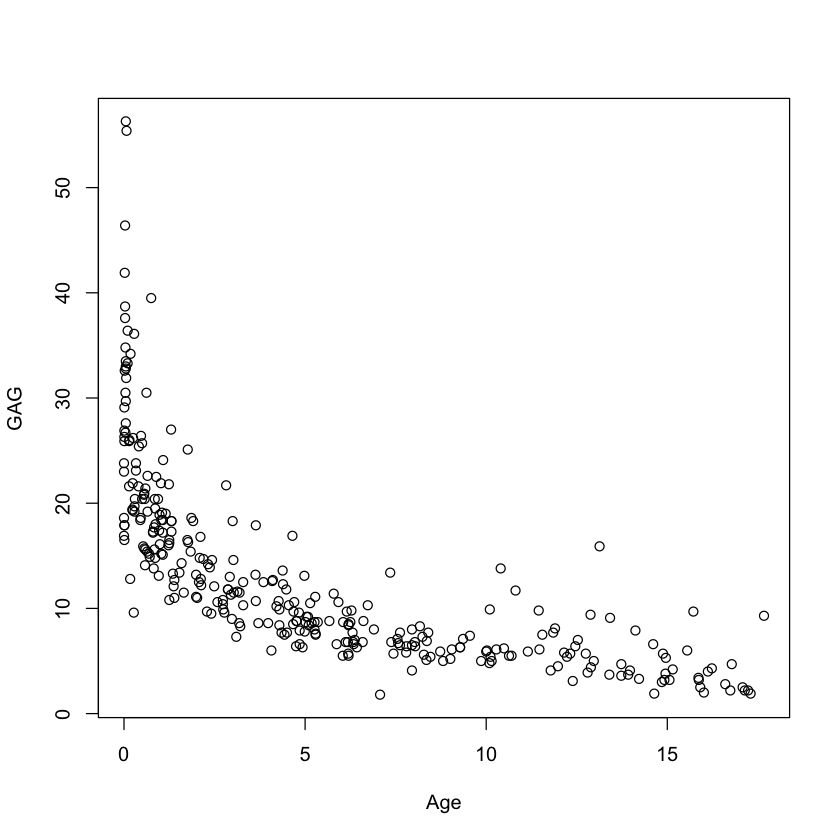

In [72]:
plot(d)

### The For loop

Just as in Python, R has a for loop. 
A for loop is built in R using the 

     for( <variable> in <sequence of values> ){
        code
     }
construct.
The simplest example is printing out the numbers from 1 to 10.

In [91]:
for(i in 1:10){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


The loop assigns the variable $i$ to each number from 1 to 10 and then executes all the code placed inside the brackets. 

#### Sequences in R
In R, a number $a$ and number $b$ with a colon inbetween is interpreted as a list of numbers starting from $a$, and incrementing by 1 until $b$ (inclusive).

In [92]:
3:13

[1]  3  4  5  6  7  8  9 10 11 12 13

R also has the seq function that allows you to enter a start and end number

In [93]:
seq(3,13)

[1]  3  4  5  6  7  8  9 10 11 12 13

as well as a third value, telling R what to increment by

In [94]:
seq(3,13,2)

[1]  3  5  7  9 11 13

### Conditionals and flow control

R has logic just as python does, allowing us to execute code if an expression evaluates to TRUE, else execute code when that expression evaluates to FALSE. TRUE and FALSE are special, reserved words in R? 
TRUE/FALSE when put inside an if/else statement in R, tells R which block of code to execute.

To demonstrate how to use the if/else and if/else if/else syntax, let's first simulate one of two random variables. 
We will run 1000 simulations and for each simulation flip a coin.
If the coin is heads the draw a sample from a $\mathcal{N}\left(1,1\right)$ distribution and if the coin is tails then draw a sample from a $\mathcal{N}\left(-1,1\right)$ distribution. 
To simulate a coin flip, we can simulate a bernoulli random variable, treating the value 1 as heads and the value 0 as tails. 

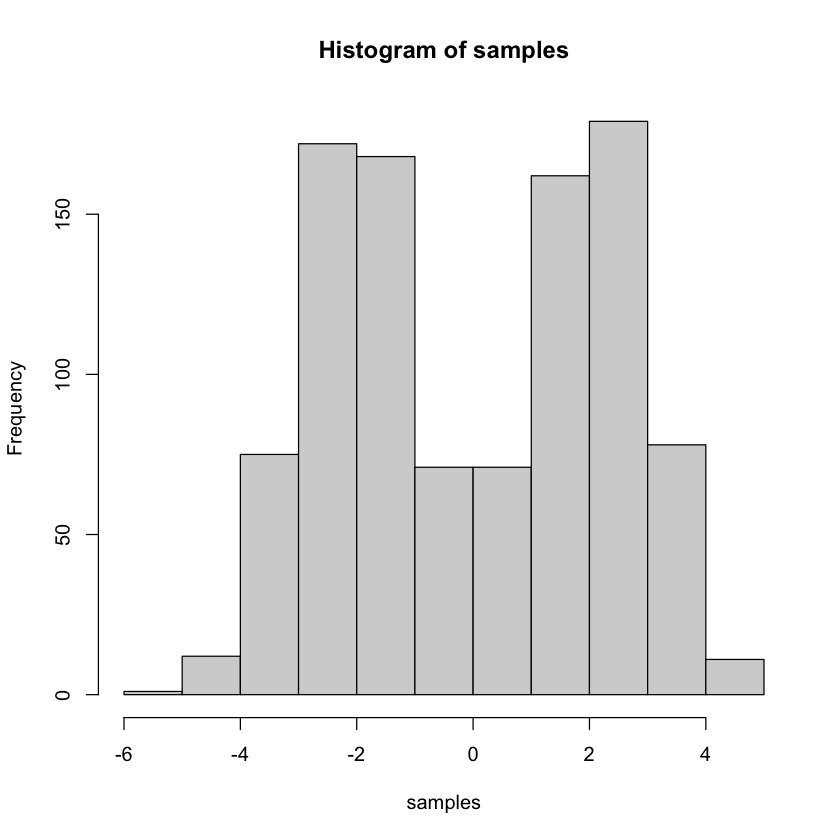

In [14]:
samples = rep(0,10^3) # make an empty vector of 1,000 zeros that we will use to store our 1,000 random variable samples. 
for (i in 1:10^(3)){
    coinflip = rbinom(n=1,p=0.5,size=1)
    if (coinflip==1){
        sample = rnorm(n=1,mean=2,sd=1) # rnorm generates a sample at random and according to the specified Normal dist.
    }else{
        sample = rnorm(n=1,mean=-2,sd=1)
    }
    samples[i]=sample
}
hist(samples) # This is how to build a histogram from a vector of values in R

Let's modify the above code to add a third normal distirbution.
We can draw a 0,1, or 2 from a binomial distribution. If the value we draw is 0 then we'll sample from $\mathcal{N}\left(-1,1\right)$ distribution. If the value we draw is 1 then we'll sample from $\mathcal{N}\left(0,1\right)$ distribution, and if 2 we draw from a  $\mathcal{N}\left(1,1\right)$ distribution.  

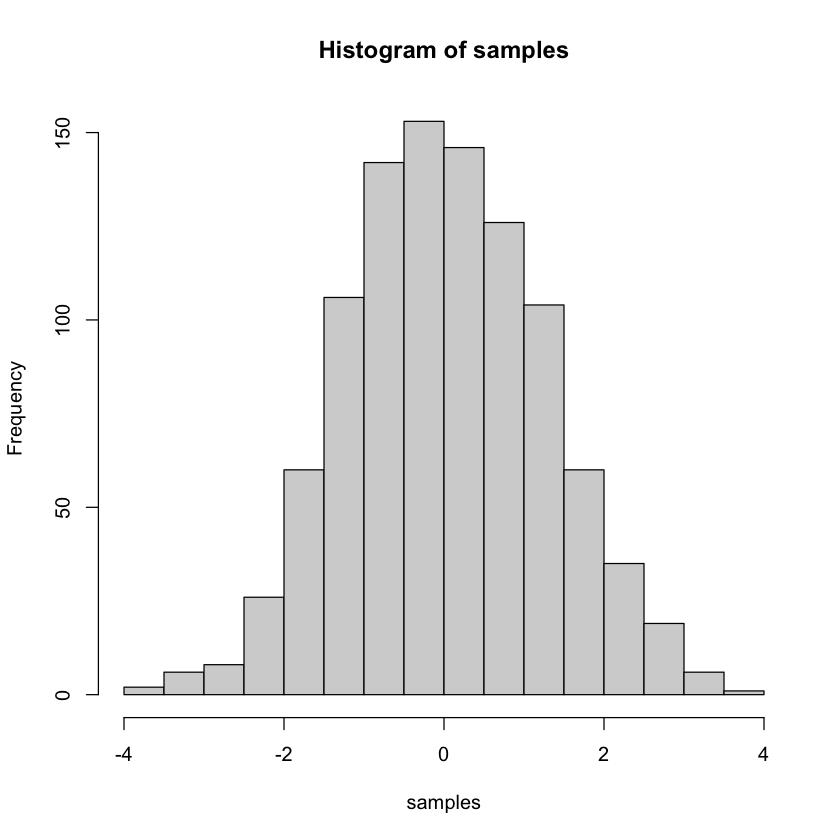

In [23]:
samples = rep(0,10^3) # make an empty vector of 1,000 zeros that we will use to store our 1,000 random variable samples. 
for (i in 1:10^(3)){
    threeOptions = rbinom(n=1,p=0.5,size=2)
    if (threeOptions==0){
        # rnorm generates a sample at random and according to the specified Normal dist.
        sample = rnorm(n=1,mean=-1,sd=1) 
    }else if (threeOptions == 1){ #< ELSE if statement!
        sample = rnorm(n=1,mean=0,sd=1)
    }else{
        sample = rnorm(n=1,mean=1,sd=1)
    }
    samples[i]=sample
}
hist(samples) # This is how to build a histogram from a vector of values in R